In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import spacy.cli
import re
import requests
import pickle


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Proyecto - Text mining/tw_source.csv", header=None, delimiter=",", quotechar='"', encoding='ISO-8859-1')
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
estructura_user = r"^@\w+"

def extraer_user(texto):
    return re.findall(estructura_user, str(texto))

In [5]:
df['user_extraido'] = df[5].apply(extraer_user)
print(df[['user_extraido']].head())

        user_extraido
0       [@switchfoot]
1                  []
2         [@Kenichan]
3                  []
4  [@nationwideclass]


In [6]:
users_expandido = df['user_extraido'].explode()

In [7]:
users_expandido = users_expandido.dropna()

In [8]:
cont_user = users_expandido.value_counts()

In [9]:
users_populares = cont_user.head()
print(users_populares)

user_extraido
@mileycyrus       3824
@tommcfly         3631
@ddlovato         2954
@DavidArchie      1106
@Jonasbrothers    1068
Name: count, dtype: int64


In [10]:
users_populares = cont_user.head(3).index

In [35]:
corpus_users = {}
for user in users_populares:
    tweets_user = df[df['user_extraido'].apply(lambda x: user in x if x else False)]

    tweets_user['Length'] = tweets_user[5].apply(lambda x: len(str(x)))

    corpus = pd.DataFrame({
        'ID': tweets_user[1],
        'Time': tweets_user[2],
        'Length': tweets_user['Length'],
        'text': tweets_user[5]
    })

    corpus_users[user] = corpus

/tmp/ipython-input-4226066385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_user['Length'] = tweets_user[5].apply(lambda x: len(str(x)))
/tmp/ipython-input-4226066385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_user['Length'] = tweets_user[5].apply(lambda x: len(str(x)))
/tmp/ipython-input-4226066385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [36]:
corpus_mileycyrus = corpus_users['@mileycyrus']
print(f"Corpus del usuario: @mileycyrus")
corpus_mileycyrus.head()

Corpus del usuario: @mileycyrus


,ID,Time,Length,text
1021,1468063101,Mon Apr 06 23:30:57 PDT 2009,107,@mileycyrus hahaha dont be like that one time ...
2014,1468286517,Tue Apr 07 00:45:20 PDT 2009,137,"@mileycyrus i have the same problem, but it's ..."
2073,1468297110,Tue Apr 07 00:49:07 PDT 2009,72,@mileycyrus I guess counting sheep didn't work...
2080,1468298918,Tue Apr 07 00:49:44 PDT 2009,100,@mileycyrus I would too if it meant spending a...
2156,1468318249,Tue Apr 07 00:56:41 PDT 2009,112,@mileycyrus AWWW u seriously have the cutest d...


In [37]:
corpus_tommcfly = corpus_users['@tommcfly']
print(f"Corpus del usuario: @tommcfly")
corpus_tommcfly.head()

Corpus del usuario: @tommcfly


,ID,Time,Length,text
1690,1468210813,Tue Apr 07 00:19:09 PDT 2009,138,@tommcfly hey saw u guys play @ pushover..didn...
1789,1468233211,Tue Apr 07 00:26:52 PDT 2009,131,@tommcfly Good morning Tom! Why can't I send y...
2514,1468391638,Tue Apr 07 01:23:07 PDT 2009,96,@tommcfly did you know that johnsons baby use ...
3524,1468618787,Tue Apr 07 02:46:02 PDT 2009,131,"@tommcfly hey, no chance of adding brighton or..."
3783,1468674970,Tue Apr 07 03:05:49 PDT 2009,82,"@tommcfly have fun tom, i need to buy eclipse ..."


In [38]:
corpus_ddlovato = corpus_users['@ddlovato']
print(f"Corpus del usuario: @ddlovato")
corpus_ddlovato.head()

Corpus del usuario: @ddlovato


,ID,Time,Length,text
460,1467929230,Mon Apr 06 22:51:34 PDT 2009,47,@ddlovato @David_Henrie ummmmm i cant find it.
573,1467953367,Mon Apr 06 22:58:30 PDT 2009,40,@ddlovato Do you hate us?? Please don't
7032,1469661950,Tue Apr 07 07:02:58 PDT 2009,96,@ddlovato Wish that i could see it.. Thats th...
7089,1469674492,Tue Apr 07 07:05:11 PDT 2009,79,"@ddlovato hey demi, wen are you and selena gon..."
8611,1548280868,Fri Apr 17 20:31:31 PDT 2009,85,@ddlovato ahhhh i wish i could go to the dalla...


In [39]:
import nltk

from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
corpus = df[5]
corpus

,5
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."
...,...
1599995,Just woke up. Having no school is the best fee...
1599996,TheWDB.com - Very cool to hear old Walt interv...
1599997,Are you ready for your MoJo Makeover? Ask me f...
1599998,Happy 38th Birthday to my boo of alll time!!! ...


In [61]:
def normalizacion(corpus):
    new_corpus = []
    for doc in corpus:
        new_corpus.append(
            re.sub(r'[^a-zA-Z0-9\s{1}áéíóúñÁÉÍÓÚ]', '', doc)
            .lower()
            .strip()
            .rstrip('\n')
            .rstrip('\r\n')
        )
    return new_corpus

In [62]:
corpus_normalizado = normalizacion(corpus)
corpus_normalizado

['switchfoot httptwitpiccom2y1zl  awww thats a bummer  you shoulda got david carr of third day to do it d',
 'is upset that he cant update his facebook by texting it and might cry as a result  school today also blah',
 'kenichan i dived many times for the ball managed to save 50  the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'nationwideclass no its not behaving at all im mad why am i here because i cant see you all over there',
 'kwesidei not the whole crew',
 'need a hug',
 'loltrish hey  long time no see yes rains a bit only a bit  lol  im fine thanks  hows you',
 'tatianak nope they didnt have it',
 'twittera que me muera',
 'spring break in plain city its snowing',
 'i just repierced my ears',
 'caregiving i couldnt bear to watch it  and i thought the ua loss was embarrassing',
 'octolinz16 it it counts idk why i did either you never talk to me anymore',
 'smarrison i wouldve been the first but i didnt have a gun    not really though zac snyders ju

# 1. Remover stopwords

In [40]:
stopwords = set(stopwords.words('english'))

def remover_stopwords(texto):
    words = re.findall(r'\w+', texto.lower())
    return [word for word in words if word not in stopwords]

In [42]:
# mileycyrus
corpus_mileycyrus = corpus_users['@mileycyrus']
corpus_mileycyrus['Words'] = corpus_mileycyrus['text'].apply(remover_stopwords)
print(f"Corpus del usuario: @mileycyrus")
corpus_mileycyrus[['text', 'Words']].head()

Corpus del usuario: @mileycyrus


,text,Words
1021,@mileycyrus hahaha dont be like that one time ...,"[mileycyrus, hahaha, dont, like, one, time, ny..."
2014,"@mileycyrus i have the same problem, but it's ...","[mileycyrus, problem, 4, 43, let, see, countin..."
2073,@mileycyrus I guess counting sheep didn't work...,"[mileycyrus, guess, counting, sheep, work, hop..."
2080,@mileycyrus I would too if it meant spending a...,"[mileycyrus, would, meant, spending, day, heav..."
2156,@mileycyrus AWWW u seriously have the cutest d...,"[mileycyrus, awww, u, seriously, cutest, dog, ..."


In [44]:
# tommcfly
corpus_tommcfly = corpus_users['@tommcfly']
corpus_tommcfly['Words'] = corpus_tommcfly['text'].apply(remover_stopwords)
print(f"\nCorpus del usuario: @tommcfly")
corpus_tommcfly[['text', 'Words']].head()


Corpus del usuario: @tommcfly


,text,Words
1690,@tommcfly hey saw u guys play @ pushover..didn...,"[tommcfly, hey, saw, u, guys, play, pushover, ..."
1789,@tommcfly Good morning Tom! Why can't I send y...,"[tommcfly, good, morning, tom, send, message, ..."
2514,@tommcfly did you know that johnsons baby use ...,"[tommcfly, know, johnsons, baby, use, animals,..."
3524,"@tommcfly hey, no chance of adding brighton or...","[tommcfly, hey, chance, adding, brighton, east..."
3783,"@tommcfly have fun tom, i need to buy eclipse ...","[tommcfly, fun, tom, need, buy, eclipse, money..."


In [45]:
# ddlovato
corpus_ddlovato = corpus_users['@ddlovato']
corpus_ddlovato['Words'] = corpus_ddlovato['text'].apply(remover_stopwords)
print(f"\nCorpus del usuario: @ddlovato")
corpus_ddlovato[['text', 'Words']].head()


Corpus del usuario: @ddlovato


,text,Words
460,@ddlovato @David_Henrie ummmmm i cant find it.,"[ddlovato, david_henrie, ummmmm, cant, find]"
573,@ddlovato Do you hate us?? Please don't,"[ddlovato, hate, us, please]"
7032,@ddlovato Wish that i could see it.. Thats th...,"[ddlovato, wish, could, see, thats, downside, ..."
7089,"@ddlovato hey demi, wen are you and selena gon...","[ddlovato, hey, demi, wen, selena, gonna, anot..."
8611,@ddlovato ahhhh i wish i could go to the dalla...,"[ddlovato, ahhhh, wish, could, go, dallas, sho..."


2. Realizar stemming y lemmatización.

2. Stemming

In [46]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem(palabras):
    palabras_stem = [stemmer.stem(palabra) for palabra in palabras]
    return ' '.join(palabras_stem)

In [48]:
# mileycyrus
corpus_mileycyrus['Stemmed'] = corpus_mileycyrus['Words'].apply(stem)
print(f"Corpus del usuario: @mileycyrus con Stemming")
corpus_mileycyrus[['text', 'Words', 'Stemmed']].head()

Corpus del usuario: @mileycyrus con Stemming


,text,Words,Stemmed
1021,@mileycyrus hahaha dont be like that one time ...,"[mileycyrus, hahaha, dont, like, one, time, ny...",mileycyru hahaha dont like one time ny got 30 ...
2014,"@mileycyrus i have the same problem, but it's ...","[mileycyrus, problem, 4, 43, let, see, countin...",mileycyru problem 4 43 let see count work 1234...
2073,@mileycyrus I guess counting sheep didn't work...,"[mileycyrus, guess, counting, sheep, work, hop...",mileycyru guess count sheep work hope get sleep
2080,@mileycyrus I would too if it meant spending a...,"[mileycyrus, would, meant, spending, day, heav...",mileycyru would meant spend day heaven w mom g...
2156,@mileycyrus AWWW u seriously have the cutest d...,"[mileycyrus, awww, u, seriously, cutest, dog, ...",mileycyru awww u serious cutest dog miley sorr...


In [50]:
# tommcfly
corpus_tommcfly = corpus_users['@tommcfly']
corpus_tommcfly['Words'] = corpus_tommcfly['text'].apply(remover_stopwords)
corpus_tommcfly['Stemmed'] = corpus_tommcfly['Words'].apply(stem)
print(f"\nCorpus del usuario: @tommcfly con Stemming")
corpus_tommcfly[['text', 'Words', 'Stemmed']].head()


Corpus del usuario: @tommcfly con Stemming


,text,Words,Stemmed
1690,@tommcfly hey saw u guys play @ pushover..didn...,"[tommcfly, hey, saw, u, guys, play, pushover, ...",tommcfli hey saw u guy play pushov get 2 meet ...
1789,@tommcfly Good morning Tom! Why can't I send y...,"[tommcfly, good, morning, tom, send, message, ...",tommcfli good morn tom send messag short quest...
2514,@tommcfly did you know that johnsons baby use ...,"[tommcfly, know, johnsons, baby, use, animals,...",tommcfli know johnson babi use anim like cute ...
3524,"@tommcfly hey, no chance of adding brighton or...","[tommcfly, hey, chance, adding, brighton, east...",tommcfli hey chanc ad brighton eastbourn ucap ...
3783,"@tommcfly have fun tom, i need to buy eclipse ...","[tommcfly, fun, tom, need, buy, eclipse, money...",tommcfli fun tom need buy eclips money sad timess


In [51]:
# ddlovato
corpus_ddlovato['Stemmed'] = corpus_ddlovato['Words'].apply(stem)
print(f"\nCorpus del usuario: @ddlovato con Stemming")
corpus_ddlovato[['text', 'Words', 'Stemmed']].head()


Corpus del usuario: @ddlovato con Stemming


,text,Words,Stemmed
460,@ddlovato @David_Henrie ummmmm i cant find it.,"[ddlovato, david_henrie, ummmmm, cant, find]",ddlovato david_henri ummmmm cant find
573,@ddlovato Do you hate us?? Please don't,"[ddlovato, hate, us, please]",ddlovato hate us pleas
7032,@ddlovato Wish that i could see it.. Thats th...,"[ddlovato, wish, could, see, thats, downside, ...",ddlovato wish could see that downsid live swed...
7089,"@ddlovato hey demi, wen are you and selena gon...","[ddlovato, hey, demi, wen, selena, gonna, anot...",ddlovato hey demi wen selena gonna anoth video...
8611,@ddlovato ahhhh i wish i could go to the dalla...,"[ddlovato, ahhhh, wish, could, go, dallas, sho...",ddlovato ahhhh wish could go dalla show wont near


2. Lemmatization

In [52]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()


def lemmatize_word(word):
    pos = wordnet.VERB if word.endswith('ing') else wordnet.NOUN
    return lemmatizer.lemmatize(word, pos)

def lemmatize_words(palabras):
    return [lemmatize_word(word) for word in palabras]

In [53]:
# Lemmatization mileycyrus
import nltk
nltk.download('wordnet')
corpus_mileycyrus['Lemmatized'] = corpus_mileycyrus['Words'].apply(lemmatize_words)
corpus_mileycyrus[['text', 'Words', 'Lemmatized']].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,Words,Lemmatized
1021,@mileycyrus hahaha dont be like that one time ...,"[mileycyrus, hahaha, dont, like, one, time, ny...","[mileycyrus, hahaha, dont, like, one, time, ny..."
2014,"@mileycyrus i have the same problem, but it's ...","[mileycyrus, problem, 4, 43, let, see, countin...","[mileycyrus, problem, 4, 43, let, see, count, ..."
2073,@mileycyrus I guess counting sheep didn't work...,"[mileycyrus, guess, counting, sheep, work, hop...","[mileycyrus, guess, count, sheep, work, hope, ..."
2080,@mileycyrus I would too if it meant spending a...,"[mileycyrus, would, meant, spending, day, heav...","[mileycyrus, would, meant, spend, day, heaven,..."
2156,@mileycyrus AWWW u seriously have the cutest d...,"[mileycyrus, awww, u, seriously, cutest, dog, ...","[mileycyrus, awww, u, seriously, cutest, dog, ..."


In [55]:
# Lemmatization tommcfly
corpus_tommcfly['Lemmatized'] = corpus_tommcfly['Words'].apply(lemmatize_words)
corpus_tommcfly[['text', 'Words', 'Lemmatized']].head()

,text,Words,Lemmatized
1690,@tommcfly hey saw u guys play @ pushover..didn...,"[tommcfly, hey, saw, u, guys, play, pushover, ...","[tommcfly, hey, saw, u, guy, play, pushover, g..."
1789,@tommcfly Good morning Tom! Why can't I send y...,"[tommcfly, good, morning, tom, send, message, ...","[tommcfly, good, morning, tom, send, message, ..."
2514,@tommcfly did you know that johnsons baby use ...,"[tommcfly, know, johnsons, baby, use, animals,...","[tommcfly, know, johnson, baby, use, animal, l..."
3524,"@tommcfly hey, no chance of adding brighton or...","[tommcfly, hey, chance, adding, brighton, east...","[tommcfly, hey, chance, add, brighton, eastbou..."
3783,"@tommcfly have fun tom, i need to buy eclipse ...","[tommcfly, fun, tom, need, buy, eclipse, money...","[tommcfly, fun, tom, need, buy, eclipse, money..."


In [56]:
# Lemmatization ddlovato
corpus_ddlovato['Lemmatized'] = corpus_ddlovato['Words'].apply(lemmatize_words)
corpus_ddlovato[['text', 'Words', 'Lemmatized']].head()

,text,Words,Lemmatized
460,@ddlovato @David_Henrie ummmmm i cant find it.,"[ddlovato, david_henrie, ummmmm, cant, find]","[ddlovato, david_henrie, ummmmm, cant, find]"
573,@ddlovato Do you hate us?? Please don't,"[ddlovato, hate, us, please]","[ddlovato, hate, u, please]"
7032,@ddlovato Wish that i could see it.. Thats th...,"[ddlovato, wish, could, see, thats, downside, ...","[ddlovato, wish, could, see, thats, downside, ..."
7089,"@ddlovato hey demi, wen are you and selena gon...","[ddlovato, hey, demi, wen, selena, gonna, anot...","[ddlovato, hey, demi, wen, selena, gonna, anot..."
8611,@ddlovato ahhhh i wish i could go to the dalla...,"[ddlovato, ahhhh, wish, could, go, dallas, sho...","[ddlovato, ahhhh, wish, could, go, dallas, sho..."


3. Mostrar un wordcloud con el top 10 para cada usuario.

In [57]:
from collections import Counter
def plot_wordcloud_top(corpus, user):
    all_words = [word for sublist in corpus['Lemmatized'] for word in sublist]
    all_words_text = ' '.join(all_words)

    word_counts = Counter(all_words_text.split())

    most_common_words = dict(word_counts.most_common(10))

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_common_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # No mostrar ejes
    plt.title(f'WordCloud de {user}')
    plt.show()

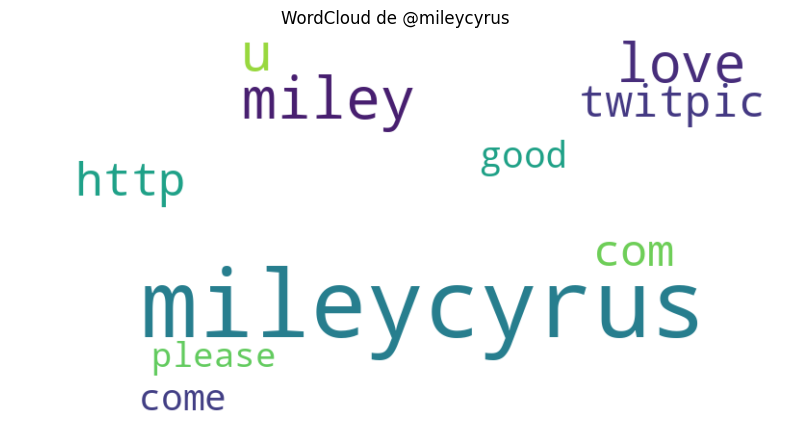

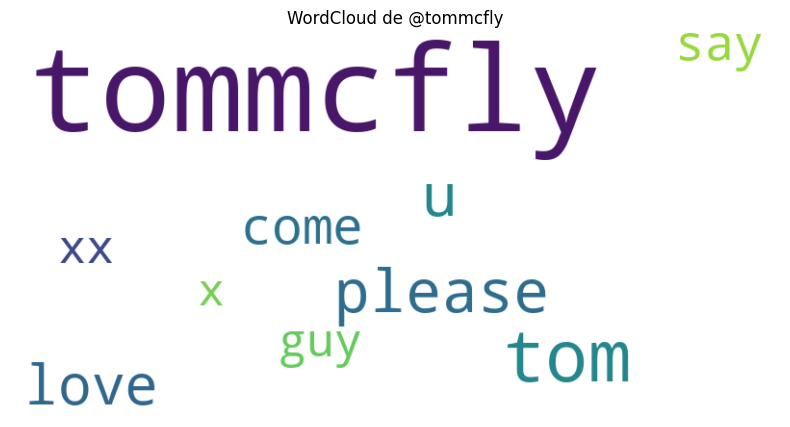

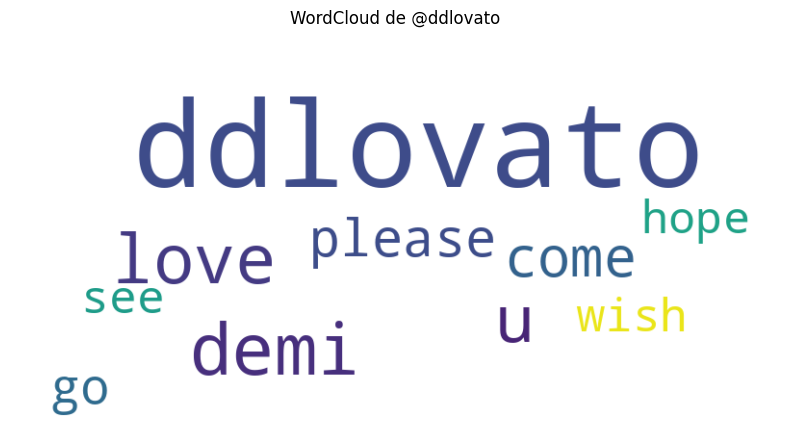

In [58]:
for user, corpus in corpus_users.items():
    plot_wordcloud_top(corpus, user)